# IBM Data Science Final Capstone Project: 

# Safer Dining in Toronto

## Introduction/Business Problem

### The Basic Idea

This project is rooted in experience.  Some years ago our family vacationed on Anna Maria Island in Florida, USA.  Once we were settled in the hotel we sought and found a local beach restaurant with a full parking lot, on the theory that if so many other people thought it was a good restaurant, we probably would too.  I ordered what were described as "conch fritters."  This turned out to be a serious mistake.  Within 8 hours I was violently ill and was confined to the hotel room for the entire 8 days we had planned to stay.
One learning from this experience was: a full parking lot does not necessarily imply a good, or even a safe, dining experience.  Another was: it might have been very helpful to have known the restaurant's history with local health authorities, as well as any reviews other patrons had shared, before digging in to those conch fritters.

### Objectives

This project is a proof of concept demonstration that uses both a proprietary fee-for-data service, Foursquare, and a public dataset called Dinesafe made freely available by the City of Toronto.  The objectives of the project (aside from satisfying the requirements of the IBM Data Science Professional Certificate Program) are two:

1) demonstrate merging proprietary and public data to address a real-life need
    a) identifying problems encountered along the way, not all of which were solved

2) create an extensible proof of concept data layer for a proposed web application. This application would deliver venue-specific data, sourced from Foursquare and the Toronto Public Health Food Premises Inspection and Disclosure database, to several audiences.

### Audiences

Potential audiences envisioned for this proof of concept are four:

1) Toronto visitors and residents who want to reduce the probability of food-borne illness when patronizing Toronto food and drink venues

2) Hoteliers and other tourist industry recommenders who seek to guide inquirers to high-quality, safe venues

3) Owners and operators of food and drink venues who want to know what potential customers will learn about their establishments, and what actual customers have said about them

4) Toronto authorities whose jurisdictions include tourism, marketing, and public health.

### Monetization

This project when and if deployed as a publicly-available web application will be funded through advertising.  It is anticipated that the bulk of advertsiing revenue will come from tourist destinations of all kinds in the Toronto area.  The same concept can be implemented anywhere the necessary data is available, not just in Toronto.

## Data

As noted above, data sources for this proof of concept project are two:
    
1) Foursquare (https://foursquare.com/), in the company's words "a location technology platform dedicated to improving how people move through the real world."  Data is accessed via the Foursquare published API, and returned in JSON format.  A developer-level account at minimum is required for genuinely usable data access.

    a) Raw data sample for the explore endpoint https://api.foursquare.com/v2/venues/explore (will be filtered to return only food and drink venues, supplied only to show format): 
            [  
               {  
                  "reasons":{  
                     "count":0,
                     "items":[  
                        {  
                           "summary":"This spot is popular",
                           "type":"general",
                           "reasonName":"globalInteractionReason"
                        }
                     ]
                  },
                  "venue":{  
                     "id":"57524de4498e4f2143e9c292",
                     "name":"Rex Pak Food Packaging Ltd",
                     "location":{  
                        "address":"85 Thornmount Dr",
                        "lat":43.805459,
                        "lng":-79.194344,
                        "labeledLatLngs":[  
                           {  
                              "label":"display",
                              "lat":43.805459,
                              "lng":-79.194344
                           }
                        ],
                        "distance":136,
                        "postalCode":"M1B 5V3",
                        "cc":"CA",
                        "city":"Scarborough",
                        "state":"ON",
                        "country":"Canada",
                        "formattedAddress":[  
                           "85 Thornmount Dr",
                           "Scarborough ON M1B 5V3",
                           "Canada"
                        ]
                     },
                     "categories":[  
                        {  
                           "id":"5453de49498eade8af355881",
                           "name":"Business Service",
                           "pluralName":"Business Services",
                           "shortName":"Business Services",
                           "icon":{  
                              "prefix":"https://ss3.4sqi.net/img/categories_v2/building/default_",
                              "suffix":".png"
                           },
                           "primary":True
                        }
                     ],
                     "photos":{  
                        "count":0,
                        "groups":[  

                        ]
                     }
                  },
                  "referralId":"e-0-57524de4498e4f2143e9c292-0"
               }
            ]
            
        b) Foursquare published data dictionary for the explore endpoint:
        
            warning   --   Presents an object with a text field that contains a warning message, if applicable (i.e. not enough results, try doing X).
            groups   --   An array of objects representing groups of recommendations. Each group contains a type such as “recommended” a human-readable (eventually localized) name such as 
                          “Recommended Places,” and an array items of recommendation objects.
            suggestedRadius (optional)   --   If no radius was specified in the request, presents the radius that was used for the query (based upon the density of venues in the query area).
            headerLocation   --   A text name for the location the user searched, e.g. “SoHo”.
            headerFullLocation   --   A full text name for the location the user searched, e.g. “SoHo, New York”.
            headerMessage   --   A message to the user based on their current context, e.g. “Suggestions for Tuesday afternoon”.
            id   --   A unique string identifier for this venue.
            name   --   The best known name for this venue.
            location   --   An object containing none, some, or all of address (street address), crossStreet, city, state, postalCode, country, lat, lng, and distance. All fields are strings, 
                            except for lat, lng, and distance. Distance is measured in meters. 
                            Some venues have their locations intentionally hidden for privacy reasons (such as private residences). If this is the case, the parameter isFuzzed will be set to true, 
                            and the lat/lng parameters will have reduced precision.
            categories   --   An array, possibly empty, of categories that have been applied to this venue. One of the categories will have a primary field indicating that it is 
                              the primary category for the venue. For the complete category tree, see categories.

2) Dinesafe (https://open.toronto.ca/dataset/dinesafe/), that the City of Toronto describes as a "snapshot of the information to the public concerning the Toronto Public Health Food Premises Inspection and Disclosure system."  Data is accessed via URL and returned in XML format.  

IMPORTANT NOTE: establishments only appear in the Dinesafe dataset when an inspection has shown some infraction of the City of Toronto health code.  Therefore (one hopes!) there will not be a 1-to-1 mapping between the venues returned by Foursquare and Dinesafe.  The joined result dataset should be a subset of the Foursquare venue data.

    a) Raw data sample (supplied only to show format):
    
        <?xml version="1.0" encoding="UTF-8"?>
        <DINESAFE_DATA>
           <ESTABLISHMENT>
              <ID>9008018</ID>
              <NAME>'K' STORE</NAME>
              <TYPE>Food Store (Convenience/Variety)</TYPE>
              <ADDRESS>99 CARLTON ST</ADDRESS>
              <LATITUDE>43.66205</LATITUDE>
              <LONGITUDE>-79.37747</LONGITUDE>
              <STATUS>Pass</STATUS>
              <INSPECTION>
                 <STATUS>Pass</STATUS>
                 <DATE>2018-03-02</DATE>
                 <INFRACTION>
                    <SEVERITY>NA - Not Applicable</SEVERITY>
                    <ACTION>Notice to Comply</ACTION>
                    <CONVICTION_DATE />
                    <COURT_OUTCOME />
                    <AMOUNT_FINED />
                 </INFRACTION>
              </INSPECTION>
              <INSPECTION>
                 <STATUS>Pass</STATUS>
                 <DATE>2019-03-29</DATE>
              </INSPECTION>
           </ESTABLISHMENT>
        </DINESAFE_DATA>
        
    b) Dinesafe published data dictionary:
        
        ROW_ID - Represents the Row Number
        ESTABLISHMENT_ID - Unique identifier for an establishment
        INSPECTION_ID - Unique identifier for each Inspection
        ESTABLISHMENT_NAME - Business name of the establishment
        ESTABLISHMENTTYPE - Establishment type ie restaurant, mobile cart
        ESTABLISHMENT_ADDRESS - Municipal address of the establishment
        LONG/LAT - Longitude & Latitude coordinates of an establishment
        ESTABLISHMENT_STATUS - Pass, Conditional Pass, Closed
        MINIMUMINSPECTIONSPERYEAR - Every eating and drinking establishment in the City of Toronto receives a minimum of 1, 2, or 3 inspections each year depending on the specific type of establishment, 
                                    the food preparation processes, volume and type of food served and other related criteria. Low risk premises that offer for sale only pre-packaged non-hazardous food 
                                    shall be inspected once every two years. The inspection frequency for these low risk premises is shown as "O" (Other) on the report and in the data set
        INFRACTION_DETAILS - Description of the Infraction
        INSPECTION_DATE - Calendar date the inspection was conducted
        SEVERITY - Level of the infraction, i.e. S - Significant, M - Minor, C - Crucial
        ACTION - Enforcement activity based on the infractions noted during a food safety inspection
        COURT_OUTCOME - The registered court decision resulting from the issuance of a ticket or summons for outstanding infractions to the Health Protection and Promotion Act
        AMOUNT_FINED - Fine determined in a court outcome
        
Reviewers should note that some available data are not used in this proof of concept.


## Code

### Proceed as we have done in preceding projects: load required libraries and get our data.

### Get Toronto venues from Foursquare

In [341]:
#first, turn off warnings to remove distractions
#this is not best practice in the general case.  For this proof of concept we choose not to see the warnings we know our approach will generate.
import warnings
warnings.filterwarnings('ignore')

In [342]:
# uncomment these installations as may be required in a given ennvironment
#install the necessary packages
#commented out here to clean up the notebook
#!pip install bs4;
#!pip install requests;
#!pip install lxml;
#!pip install cchardet;
#!pip install jellyfish;
#!pip install d6tstack;
#!pip install commonregex;

#import the necessary libraries
import urllib;
import pandas as pd;
from bs4 import BeautifulSoup;
import numpy as np;
import requests;
import json;
import xml.etree.ElementTree as ET

#!pip install geopy --quiet; 
from geopy.geocoders import Nominatim; # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm;
import matplotlib.colors as colors;

# import k-means from clustering stage
from sklearn.cluster import KMeans;

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you need Foursquare API installed
import folium; # map rendering library

#set the url to scrape
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M';

#and you may ask yourself "how do I know these are Toronto postal codes?"
#answer: because they have the first letter M and they came from the Wikipedia page :-).

#get the parsed text from the url using the lxml parser
html = urllib.request.urlopen(url);
bs = BeautifulSoup(html,'lxml');

#use BeautifulSoup4 to find the table we need
table_object = bs.find(lambda tag: tag.name=='table',attrs={"class": "wikitable sortable"}); 

#use BeautifulSoup4 to get all rows in the table
row_objects = table_object.tbody.find_all(lambda tag: tag.name=='tr');

#create and populate a list to stage the data for pandas
toronto_data_row_list = [];

#define a function to get rows by tag (is it header or data?)
def get_rows_by_tag(tr, column_tag='td'): # td (data) or th (header)       
        return [td.get_text(strip=True) for td in tr.find_all(column_tag)];

#append the header row to the list
toronto_headers = get_rows_by_tag(row_objects[0], 'th');
toronto_data_row_list.append(toronto_headers);

#append the data rows to the list
for tr in row_objects:
    toronto_data_row_list.append(get_rows_by_tag(tr, 'td'));

#use pandas to create a dataframe from the list
toronto_pc_df = pd.DataFrame(toronto_data_row_list[1:], columns=toronto_data_row_list[0]);

#delete rows with null Postcode
toronto_pc_df = toronto_pc_df[toronto_pc_df.Postcode.notnull()] 

#delete rows with Borough = 'Not assigned'
toronto_pc_df = toronto_pc_df[toronto_pc_df.Borough != 'Not assigned'];

#aggregate rows with the same Postcode and Borough to create a comma-delimited Neighbourhood column
toronto_pc_df = toronto_pc_df.groupby(['Postcode']).  \
    agg({'Borough' : 'first' , 'Neighbourhood' : ', '.join})  \
   .reset_index()  \
   .reindex(columns = toronto_pc_df.columns);

#rename Postcode column to PostalCode as shown in assignment
toronto_pc_df.rename(columns = {'Postcode' : 'PostalCode'}, inplace = True);

#where 'Neighbourhood' is Not assigned, copy the Borough to Neighbourhood
toronto_pc_df.loc[(toronto_pc_df.Neighbourhood=='Not assigned'), 'Neighbourhood'] = toronto_pc_df.Borough;

#long and repeated attempts to use geocoder failed miserably, completely useless
#now shifting to the downloaded csv file.

#ingest the data from the csv file into a pandas dataframe
#note that the original Postal Code column name was changed to PostalCode using Excel
#the csv file was downloaded to the development Windows workstation.
toronto_gc_df = pd.read_csv('C:/Users/mike/Desktop/Geospatial_Coordinates.csv', sep = ',');

#merge the original dataframe with the geocode dataframe joining on PostalCode
toronto_pc_gc_df = pd.merge(toronto_pc_df, toronto_gc_df, on='PostalCode');

# go through the required song and dance to access Foursquare
CLIENT_ID = 'XWT3TKOHVZGYK01HQXA55GEVK0ELBASPAATUMIEZZUU0O4TZ'; #  Foursquare ID
CLIENT_SECRET = '1BSG4SRZIW4GRSPXJ4Q5DR0BQ0FWMWGP4XJYP02WYPM2ITQ'; #  Foursquare Secret
TheMagicToken = 'TVUYECOF53QZZCSQOQ4QPQ55LZRW2SKDJNIE5VUWJCGFLFIY'; # Foursquare OAuth token
VERSION = '20180605' # Foursquare API version

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name'];
    
LIMIT = 50; # limit of number of venues returned by Foursquare API
radius = 500; # define radius from neighborhood centroid in meters

# function to get venues within walking distance of a given neighborhood centroid
def getNearbyVenues(names, postalcodes,latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, postalcode, lat, lng in zip(names, postalcodes, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&oauth_token={}&v={}&ll={},{}&radius={}&limit={}'.format(
            TheMagicToken,
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items'];
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            postalcode,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['formattedAddress'],
            v['venue']['categories'][0]['name']) for v in results]);

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]);
    nearby_venues.columns = ['Neighborhood', 
                             'PostalCode',
                              'Neighborhood Latitude', 
                              'Neighborhood Longitude', 
                              'Venue', 
                              'VenueID',
                              'Venue Latitude', 
                              'Venue Longitude', 
                              'Venue Address', 
                              'Venue Category'];
    
    return(nearby_venues);
    
toronto_venues = getNearbyVenues(names=toronto_pc_gc_df['Neighbourhood'],
                                 postalcodes=toronto_pc_gc_df['PostalCode'],
                                   latitudes=toronto_pc_gc_df['Latitude'],
                                   longitudes=toronto_pc_gc_df['Longitude']
                                  )

In [343]:
# check to see that data returned as expected
toronto_venues.head(10)
#print(str(toronto_venues));

,Neighborhood,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Address,Venue Category
0,"Rouge, Malvern",M1B,43.806686,-79.194353,Wendy's,4bb6b9446edc76b0d771311c,43.807448,-79.199056,"[Toronto ON, Canada]",Fast Food Restaurant
1,"Rouge, Malvern",M1B,43.806686,-79.194353,NT Home Service Inc.,57c3aa14cd10129f99e0c9e2,43.806411,-79.197736,"[50 Venture Dr #10, Scarborough ON M1B 3L6, Ca...",Home Service
2,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497,RIGHT WAY TO GOLF,555c7b97498e157737abdcd6,43.785177,-79.161108,"[13-229 Meadowvale Road, Scarborough ON M1C 5B...",Golf Course
3,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497,Chris Effects Painting,587eee906d349d5759059742,43.784343,-79.163742,"[65 Lawson Road, Scarborough ON M1C 2J1, Canada]",Construction & Landscaping
4,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497,Affordable Toronto Movers,5898005b76b8b25854c36663,43.787919,-79.162977,"[6262 kingston rd, Toronto ON M1C 1K9, Canada]",Moving Target
5,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,G & G Electronics,4c62f34bde1b2d7fec89e370,43.765309,-79.191537,"[4371 kingston road, Toronto ON M1E 2M9, Canada]",Electronics Store
6,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Marina Spa,522deb21abdf65cfbab70655,43.766000,-79.191000,"[4379 Kingston Road, Scarborough ON, Canada]",Spa
7,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Big Bite Burrito,5411f741498e9ebd5e35d8bd,43.766299,-79.190720,"[4383 Kingston rd., Scarborough ON, Canada]",Mexican Restaurant
8,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,chatr Mobile,5b8004ff9fca56002cffd9cc,43.766140,-79.191630,"[4352 Kingston Rd, Unit 7B, Toronto ON M1E 2M8...",Electronics Store
9,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Enterprise Rent-A-Car,4c1c7f9bb306c9288f0464b7,43.764076,-79.193406,"[4304 Kingston Rd, Scarborough ON M1E 2M8, Can...",Rental Car Location


In [344]:
#what is the shape of the Foursquare dataset, and what venue categories are included in it?
toronto_venues.info()
#uncomment to see all the categories
#toronto_venues['Venue Category'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 10 columns):
Neighborhood              2057 non-null object
PostalCode                2057 non-null object
Neighborhood Latitude     2057 non-null float64
Neighborhood Longitude    2057 non-null float64
Venue                     2057 non-null object
VenueID                   2057 non-null object
Venue Latitude            2057 non-null float64
Venue Longitude           2057 non-null float64
Venue Address             2057 non-null object
Venue Category            2057 non-null object
dtypes: float64(4), object(6)
memory usage: 160.8+ KB


In [345]:
#filter venue data to return only food and drink establishments

#in case we want to see all the available rows, probably not, but anyway...
pd.set_option('display.max_row', 30000)

toronto_restaurants = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant|Joint|Bar|Spot|Deli|Diner|Creperie|Bagel|Dessert|Sandwich|Tea Room|Donut|Cheese|Noodle|Bakery|Café|Pub|Pizza|Food|Food Court|Fish & Chips|Coffee|Ice Cream|Salad|Steakhouse|Gastropub', na=False)]

#what is the shape of the filtered dataset?
toronto_restaurants.info()

toronto_restaurants.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 2055
Data columns (total 10 columns):
Neighborhood              1047 non-null object
PostalCode                1047 non-null object
Neighborhood Latitude     1047 non-null float64
Neighborhood Longitude    1047 non-null float64
Venue                     1047 non-null object
VenueID                   1047 non-null object
Venue Latitude            1047 non-null float64
Venue Longitude           1047 non-null float64
Venue Address             1047 non-null object
Venue Category            1047 non-null object
dtypes: float64(4), object(6)
memory usage: 90.0+ KB


,Neighborhood,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Address,Venue Category
0,"Rouge, Malvern",M1B,43.806686,-79.194353,Wendy's,4bb6b9446edc76b0d771311c,43.807448,-79.199056,"[Toronto ON, Canada]",Fast Food Restaurant
7,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Big Bite Burrito,5411f741498e9ebd5e35d8bd,43.766299,-79.190720,"[4383 Kingston rd., Scarborough ON, Canada]",Mexican Restaurant
14,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Eggsmart,4d95bd2ddaec224bf7bf043e,43.767800,-79.190466,"[4410 Kingston Rd. (at Lawerence Ave. E), Toro...",Breakfast Spot
15,Woburn,M1G,43.770992,-79.216917,Starbucks,4cc1d28c06c254815ac18547,43.770037,-79.221156,"[300 Borough Dr (Scarborough Town Centre), Sca...",Coffee Shop
16,Woburn,M1G,43.770992,-79.216917,Tim Hortons,5164bf50e4b0ca7ab1d9ed8b,43.770827,-79.223078,"[1100 Markham Rd (Ellesmere Rd), Scarborough O...",Coffee Shop
17,Woburn,M1G,43.770992,-79.216917,Korean Grill House,4de0403ed4c040523ea079f4,43.770812,-79.214502,"[369 Yonge Street, Toronto ON, Canada]",Korean Restaurant
19,Woburn,M1G,43.770992,-79.216917,"El rey del cabrito, monterrey city mexico",52b128ae498ee935a36869a6,43.768800,-79.219800,"[Ave. Gonzalitos, Monterrey Nuevo Leon. Mexico...",Mexican Restaurant
21,Woburn,M1G,43.770992,-79.216917,Al-Hamd Biryani & Pizza,4fc6c295e4b0c5a82f0465f8,43.767585,-79.219570,"[846 Markham Rd (Painted Post Dr), Toronto ON,...",Indian Restaurant
24,Cedarbrae,M1H,43.773136,-79.239476,Federick Restaurant,4b1711a6f964a520cbc123e3,43.774697,-79.241142,"[1920 Ellesmere Rd (at Bellamy Rd. N), Scarbor...",Hakka Restaurant
25,Cedarbrae,M1H,43.773136,-79.239476,Drupati's Roti & Doubles,4e261f261f6eb1ae13930699,43.775222,-79.241678,"[1085 Bellamy Rd N (Bellamy & Ellesmere), Scar...",Caribbean Restaurant


In [ ]:
### In order to join or merge the list of food and drink outlets with the Dinesafe data set, we need keys that uniquely identify each venue.
### Manual inspection of the data encourages us to use the establishment's street address, together with the first word of the establishment's name,
### as a composite key that uniquely identifies each establishment.

In [346]:
#convert Venue Address column into a string from a list

toronto_restaurants['Venue Address'] = toronto_restaurants['Venue Address'].apply(', '.join)

In [347]:
#extract just the street address from the overall address
from commonregex import CommonRegex
parser = CommonRegex()
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Address'].apply(lambda x: parser.street_addresses(x))

In [348]:
#convert Venue Street Address column into a string from a list
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].apply(', '.join)
#toronto_restaurants.shape

In [349]:
toronto_restaurants.head(10)
#drop rows without a street address, we need the street address to join to the Dinesafe dataset
toronto_restaurants= toronto_restaurants[(toronto_restaurants['Venue Street Address']!='')]

In [350]:
#as we see we went from 1044 venues down to 842, ~19% loss
toronto_restaurants.head(10)


,Neighborhood,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Address,Venue Category,Venue Street Address
14,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Eggsmart,4d95bd2ddaec224bf7bf043e,43.767800,-79.190466,"4410 Kingston Rd. (at Lawerence Ave. E), Toron...",Breakfast Spot,4410 Kingston Rd.
15,Woburn,M1G,43.770992,-79.216917,Starbucks,4cc1d28c06c254815ac18547,43.770037,-79.221156,"300 Borough Dr (Scarborough Town Centre), Scar...",Coffee Shop,300 Borough Dr
16,Woburn,M1G,43.770992,-79.216917,Tim Hortons,5164bf50e4b0ca7ab1d9ed8b,43.770827,-79.223078,"1100 Markham Rd (Ellesmere Rd), Scarborough ON...",Coffee Shop,1100 Markham Rd
17,Woburn,M1G,43.770992,-79.216917,Korean Grill House,4de0403ed4c040523ea079f4,43.770812,-79.214502,"369 Yonge Street, Toronto ON, Canada",Korean Restaurant,"369 Yonge Street,"
21,Woburn,M1G,43.770992,-79.216917,Al-Hamd Biryani & Pizza,4fc6c295e4b0c5a82f0465f8,43.767585,-79.219570,"846 Markham Rd (Painted Post Dr), Toronto ON, ...",Indian Restaurant,846 Markham Rd
24,Cedarbrae,M1H,43.773136,-79.239476,Federick Restaurant,4b1711a6f964a520cbc123e3,43.774697,-79.241142,"1920 Ellesmere Rd (at Bellamy Rd. N), Scarboro...",Hakka Restaurant,1920 Ellesmere Rd
25,Cedarbrae,M1H,43.773136,-79.239476,Drupati's Roti & Doubles,4e261f261f6eb1ae13930699,43.775222,-79.241678,"1085 Bellamy Rd N (Bellamy & Ellesmere), Scarb...",Caribbean Restaurant,1085 Bellamy Rd
26,Cedarbrae,M1H,43.773136,-79.239476,Thai One On,4c27da423492a593158cb628,43.774468,-79.241268,"1911 Ellesmere Road (Bellamy and Ellesmere), T...",Thai Restaurant,1911 Ellesmere Road
34,Cedarbrae,M1H,43.773136,-79.239476,Popeyes Louisiana Kitchen,4cddfe25db125481ff0b2ece,43.775930,-79.235328,"2030 Ellesmere Rd (Dolly Varden Blvd), Toronto...",Fried Chicken Joint,2030 Ellesmere Rd
36,Cedarbrae,M1H,43.773136,-79.239476,grilled39,50f5ea35830234202f41d01e,43.776160,-79.235287,"2030 Ellesmere Road (Markham & Ellesmere), Sca...",Burger Joint,2030 Ellesmere Road


In [351]:
#remove '.' and ',' from Venue Street Address column
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('.', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(',', '')

#change long-form street type name to abbreviation
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Road', 'Rd')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('road', 'Rd')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('ROAD', 'Rd')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Street', 'St')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('street', 'St')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('STREET', 'St')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Drive', 'Dr')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Boulevard', 'Blvd')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Court', 'Ct')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Avenue', 'Ave')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('BOULEVARD', 'Blvd')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('AVENUE', 'Ave')

#remove East and West at end of street address
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' West', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' East', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' west', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' east', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' WEST', '')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace(' EAST', '')

#fix one-off weirdnesses

toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('85 Laird', '85 Laird Dr')
#oops
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('85 Laird Dr Dr', '85 Laird Dr')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('93 Laird', '93 Laird Dr')
#consistency is the hobgoblin of little minds, and also of data engineering, and ESPECIALLY of Foursquare
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Harbord Dr', 'Harbord')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Harbord', 'Harbord Dr')
toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].str.replace('Claire', 'Clair')

In [352]:
#show me what ya got, but first make it upper case

toronto_restaurants['Venue Street Address'] = toronto_restaurants['Venue Street Address'].apply(lambda x: x.upper())
#uncomment to see all the street addresses
#toronto_restaurants['Venue Street Address'] 

In [353]:
#now we need another key column to straighten out our join.
#we will use the first word of the venue name and use it in combination with the street address
#again we have to get rid of that annoying "ASSEMBLY CHEF's HALL" arrggh

toronto_restaurants['NameFirstWord'] = toronto_restaurants['Venue'].apply(lambda x: x.upper())
#...brute force, regex not covering for some reason, probably doing it wrong, tired
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL -','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL -','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL-','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL -  ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEF\'S HALL- ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEFS HALL- ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEFS HALL - ','')
toronto_restaurants['NameFirstWord'] = toronto_restaurants['NameFirstWord'].str.replace('ASSEMBLY CHEFS HALL -','')


toronto_restaurants['NameFirstWord'] = toronto_restaurants.NameFirstWord.str.split().str.get(0)

#toronto_restaurants.head(10)

### Get Toronto Dinesafe dataset from Toronto Open Data

In [354]:
# https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/c3ebef25-177b-4adc-9c47-8763b04a52fb

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/c3ebef25-177b-4adc-9c47-8763b04a52fb"

# get url content
response = requests.get(url).content
soup = BeautifulSoup(response,'lxml')

with open('DinesafeRaw.xml', 'w+') as f:
    f.write(str(soup))

In [355]:
#flatten the 3-level nested Dinesafe XML result into a pandas dataframe, loop-de-loop-de-loop
#using ElementTree for convenience

#because we will merge this dataset with the postal code dataset created above, for simplicity we use a single Big Flat Table.

#note that the Toronto Dinesafe data contain certain characters that make the raw xml unusable in UTF-8 encoding
#these include É (00C9), é (00E9), and Ä (00C4)
#for now these were manually substituted using Altova XMLSpy 2020.  XMLSpy was also used to prettify the XML result.  Need to do that in native Python.

#Dinesafe.xml was cleaned up externally, not in this notebook, in this version as of 202002261955 UTC -4.

#this is pretty slow actually

tree = ET.parse('C:/Users/mike/Desktop/Dinesafe.xml');
root = tree.getroot();
estRow = [];
allEstRows = [];
for e in root.iter('establishment'):
    estID = e.find('id').text
    estName = e.find('name').text
    estType = e.find('type').text
    estAddr = e.find('address').text
    estLat = e.find('latitude').text
    estLong = e.find('longitude').text
    estStat = e.find('status').text
    for insp in e.iter('inspection'):
        inspStat = insp.find('status').text
        inspDate = insp.find('date').text
        for infr in insp.iter('infraction'):
            infrSeverity = infr.find('severity').text
            infrAction = infr.find('action').text
            infrConvDate = infr.find('conviction_date').text
            infrCrtOutcome = infr.find('court_outcome').text
            infrAmtFined = infr.find('amount_fined').text
            estRow = [estID,estName,estType,estAddr,estLat,estLong,estStat,inspDate,inspStat,infrSeverity,infrAction,infrCrtOutcome,infrConvDate,infrAmtFined]
            allEstRows.append(estRow)
                  
dfDinesafe = pd.DataFrame(allEstRows,columns=['Establishment_ID','Establishment_Name','Establishment_Type','Establishment_Addr','Establishment_Lat','Establishment_Long','Establishment_Current_Status','Inspection_Date','Inspection_Status','Infraction_Severity','Infraction_Action_Taken','Infraction_Court_Outcome','Infraction_Conviction_Date','Infraction_Aount_Fined']);       
#check the result: are we good?
dfDinesafe.head(10)
#yes!

,Establishment_ID,Establishment_Name,Establishment_Type,Establishment_Addr,Establishment_Lat,Establishment_Long,Establishment_Current_Status,Inspection_Date,Inspection_Status,Infraction_Severity,Infraction_Action_Taken,Infraction_Court_Outcome,Infraction_Conviction_Date,Infraction_Aount_Fined
0,9008018,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747,Pass,2018-03-02,Pass,NA - Not Applicable,Notice to Comply,None,None,None
1,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,S - Significant,Notice to Comply,None,None,None
2,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,S - Significant,Notice to Comply,None,None,None
3,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,S - Significant,Notice to Comply,None,None,None
4,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,C - Crucial,Notice to Comply,None,None,None
5,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,M - Minor,Notice to Comply,None,None,None
6,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-03-04,Conditional Pass,M - Minor,Notice to Comply,None,None,None
7,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,M - Minor,Notice to Comply,None,None,None
8,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,M - Minor,Notice to Comply,None,None,None
9,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,NA - Not Applicable,Notice to Comply,None,None,None


### convert the Inspection_Date column from string to datetime, lat and long to float64

In [356]:
dfDinesafe['Inspection_Date']= pd.to_datetime(dfDinesafe['Inspection_Date']);

In [357]:
#restrict Dinesafe dataset to inspections performed on or after June 1, 2019
dfDinesafeRecent = dfDinesafe[dfDinesafe['Inspection_Date'].dt.date > pd.to_datetime('2019-05-31')];

dfDinesafeRecent.head(10)

,Establishment_ID,Establishment_Name,Establishment_Type,Establishment_Addr,Establishment_Lat,Establishment_Long,Establishment_Current_Status,Inspection_Date,Inspection_Status,Infraction_Severity,Infraction_Action_Taken,Infraction_Court_Outcome,Infraction_Conviction_Date,Infraction_Aount_Fined
7,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,M - Minor,Notice to Comply,None,None,None
8,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,M - Minor,Notice to Comply,None,None,None
9,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2019-10-24,Pass,NA - Not Applicable,Notice to Comply,None,None,None
10,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,M - Minor,Notice to Comply,None,None,None
11,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,S - Significant,Corrected During Inspection,None,None,None
12,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,M - Minor,Notice to Comply,None,None,None
13,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,M - Minor,Notice to Comply,None,None,None
14,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,M - Minor,Notice to Comply,None,None,None
15,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,2020-02-14,Pass,NA - Not Applicable,Notice to Comply,None,None,None
16,10325728,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012,Pass,2019-08-14,Pass,M - Minor,Notice to Comply,None,None,None


In [358]:
#groom these data as we did for toronto_restaurants

dfDinesafeRecent['Establishment_Addr'] = dfDinesafeRecent['Establishment_Addr'].apply(lambda x: parser.street_addresses(x));
dfDinesafeRecent['Establishment_Lat']= dfDinesafeRecent['Establishment_Lat'].astype(np.float64);
dfDinesafeRecent['Establishment_Long']= dfDinesafeRecent['Establishment_Long'].astype(np.float64);

In [359]:
#dfDinesafeRecent['Establishment_Addr'] = dfDinesafeRecent['Establishment_Addr'].apply(', '.join);
#add the NameFirstWord column for join
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['Establishment_Name']
#first fix all the idiotic variations on ASSEMBLY CHEF'S HALL - ...brute force, regex not covering for some reason, probably doing it wrong, tired
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL -','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL -','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL-','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL -  ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL - ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEF\'S HALL- ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEFS HALL- ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEFS HALL - ','')
dfDinesafeRecent['NameWithoutAssemblyChefsHall'] = dfDinesafeRecent['NameWithoutAssemblyChefsHall'].str.replace('ASSEMBLY CHEFS HALL -','')

dfDinesafeRecent['NameFirstWord'] = dfDinesafeRecent.NameWithoutAssemblyChefsHall.str.split().str.get(0)
dfDinesafeRecent['NameFirstWord'] = dfDinesafeRecent['NameFirstWord'].apply(lambda x: x.upper())


## Experiment shows that lat/long alone is insufficient as a join criterion, because 
###  a) Foursquare and Dinesafe return different levels of precision for lat/long values
###  b) the values of what appear to be "the same" borough/neighborhood are different between the 2 services
###  c) the Foursquare lat/long data are grossly inconsistent and inaccurate, clearly nobody at Foursquare is validating the input
####           i) in our testing Foursquare location data and Dinesafe location data were shown to differ by as much as 6 km for a given location (!).

In [371]:
#first change the name of the Establishment_Name column in the Dinesafe dataset to Venue, so we can merge with it (join)
dfDinesafeRecent.rename(columns = {'Establishment_Addr':'StreetAddress'}, inplace = True) 
toronto_restaurants.rename(columns = {'Venue Street Address':'StreetAddress'}, inplace = True) 

In [372]:
#get the Dinesafe street address out of its list into a string
dfDinesafeRecent['StreetAddress'] = dfDinesafeRecent['StreetAddress'].apply(', '.join);


In [373]:
#drop blank street addresses
#drop rows without a street address, we need the street address to join to the Dinesafe dataset
dfDinesafeRecent= dfDinesafeRecent[(dfDinesafeRecent['StreetAddress']!='')]

In [376]:
#dfDinesafeRecent['CompositeKey'] = dfDinesafeRecent['NameFirstWord'].map(str) + dfDinesafeRecent['StreetAddress'].map(str)
#toronto_restaurants['CompositeKey'] = toronto_restaurants['NameFirstWord'].map(str) + toronto_restaurants['StreetAddress'].map(str)
#toronto_restaurants.head(5)
#toronto_restaurants.drop_duplicates(subset ="CompositeKey", 
#                    keep = False, inplace = True) 
#toronto_restaurants.info()
#toronto_restaurants.to_csv('C:/Users/mike/Documents/IBMCourse9/toronto_restaurants.csv')
#dfDinesafeRecent.to_csv('C:/Users/mike/Documents/IBMCourse9/dfDinesafeRecent.csv')

,Neighborhood,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,VenueID,Venue Latitude,Venue Longitude,Venue Address,Venue Category,StreetAddress,NameFirstWord,CompositeKey
14,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,Eggsmart,4d95bd2ddaec224bf7bf043e,43.767800,-79.190466,"4410 Kingston Rd. (at Lawerence Ave. E), Toron...",Breakfast Spot,4410 KINGSTON RD,EGGSMART,EGGSMART4410 KINGSTON RD
15,Woburn,M1G,43.770992,-79.216917,Starbucks,4cc1d28c06c254815ac18547,43.770037,-79.221156,"300 Borough Dr (Scarborough Town Centre), Scar...",Coffee Shop,300 BOROUGH DR,STARBUCKS,STARBUCKS300 BOROUGH DR
16,Woburn,M1G,43.770992,-79.216917,Tim Hortons,5164bf50e4b0ca7ab1d9ed8b,43.770827,-79.223078,"1100 Markham Rd (Ellesmere Rd), Scarborough ON...",Coffee Shop,1100 MARKHAM RD,TIM,TIM1100 MARKHAM RD
17,Woburn,M1G,43.770992,-79.216917,Korean Grill House,4de0403ed4c040523ea079f4,43.770812,-79.214502,"369 Yonge Street, Toronto ON, Canada",Korean Restaurant,369 YONGE ST,KOREAN,KOREAN369 YONGE ST
21,Woburn,M1G,43.770992,-79.216917,Al-Hamd Biryani & Pizza,4fc6c295e4b0c5a82f0465f8,43.767585,-79.219570,"846 Markham Rd (Painted Post Dr), Toronto ON, ...",Indian Restaurant,846 MARKHAM RD,AL-HAMD,AL-HAMD846 MARKHAM RD


In [377]:
#join the datasets
TorontoDinesafeVenues= pd.merge(left=toronto_restaurants, right=dfDinesafeRecent, on=['CompositeKey'], how='inner')

In [378]:
#now add a composite key for convenience in grouping, counting, etc. 
#could have done this earlier but wanted to make sure things were working.
TorontoDinesafeVenues.to_csv('C:/Users/mike/Documents/IBMCourse9/DineSafeVenues.csv')


In [325]:
TorontoDinesafeVenues.to_csv('C:/Users/mike/Documents/IBMCourse9/capstone3.csv')

## At this point we have a dataset TorontoDinesafeVenues comprising the Foursquare venues in Toronto that have a Dinesafe record issued since June 1, 2019.  Dinesafe includes only venues with infractions.

In [379]:
#get the Foursquare venue categories in the sample
TorontoDinesafeVenues['Venue Category'].unique()

array(['Breakfast Spot', 'Caribbean Restaurant', 'Chinese Restaurant',
       'Café', 'Indian Restaurant', 'Vietnamese Restaurant',
       'Fish & Chips Shop', 'Italian Restaurant', 'Coffee Shop',
       'Fast Food Restaurant', 'Restaurant', 'Bakery', 'Burger Joint',
       'Juice Bar', 'Japanese Restaurant', 'Wings Joint',
       'Ramen Restaurant', 'Deli / Bodega', 'Middle Eastern Restaurant',
       'Sushi Restaurant', 'Diner', 'Pizza Place', 'Bar',
       'Asian Restaurant', 'Greek Restaurant', 'Ice Cream Shop', 'Pub',
       'Sandwich Place', 'Cheese Shop', 'Thai Restaurant',
       'Food & Drink Shop', 'Dessert Shop', 'Fried Chicken Joint',
       'Gastropub', 'Mexican Restaurant', 'Creperie', 'Gay Bar',
       'American Restaurant', 'Steakhouse', 'Beer Bar', 'Food Truck',
       'New American Restaurant', 'Vegetarian / Vegan Restaurant',
       'Seafood Restaurant', 'Bagel Shop', 'Salad Place',
       'Gluten-free Restaurant', 'Wine Bar', 'Belgian Restaurant',
       'Dumpling R

In [390]:
# get a venue-by-venue count of Dinesafe infractions
dfVenuesWithHighestInfractions = TorontoDinesafeVenues.groupby('Establishment_Name', as_index=False).agg({"Infraction_Severity": "count"})
#rename Infraction_Severity to Infraction_Count
dfVenuesWithHighestInfractions.rename(columns={'Infraction_Severity':'Infraction_Count'}, inplace=True)

In [396]:
#sort descending and get Top 10
dfVenuesWithHighestInfractions.sort_values(by=['Infraction_Count'], inplace=True, ascending=False)

In [398]:
dfVHITop10 = dfVenuesWithHighestInfractions.head(10)

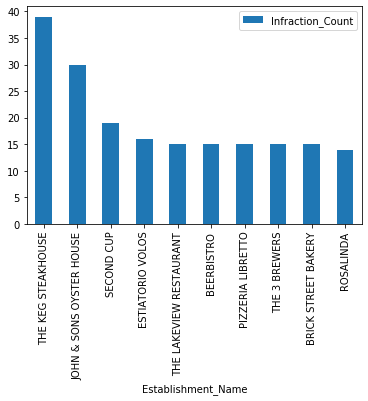

In [401]:
dfVHITop10.plot(kind='bar',x='Establishment_Name',y='Infraction_Count')

In [415]:
dfAverageCategoryInfraction = TorontoDinesafeVenues.groupby('Venue Category', as_index=False).agg({'Infraction_Severity' : 'count', 'Establishment_Name': pd.Series.nunique})

In [417]:
dfAverageCategoryInfraction['CategoryAverageInfractions'] = dfAverageCategoryInfraction['Infraction_Severity'] / dfAverageCategoryInfraction['Establishment_Name']

In [422]:
dfAverageCategoryInfraction.sort_values(by=['CategoryAverageInfractions'], inplace=True, ascending=False)

In [423]:
dfACITop10 = dfAverageCategoryInfraction.head(10)

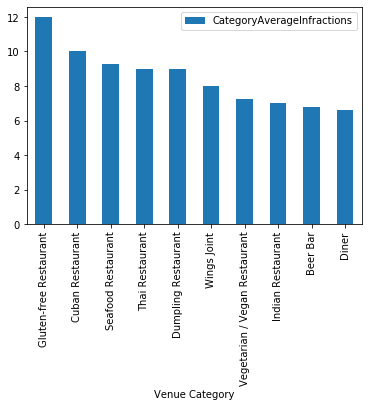

In [424]:
dfACITop10.plot(kind='bar',x='Venue Category',y='CategoryAverageInfractions')